<a href="https://colab.research.google.com/github/vivianapurba/Analisis_Data_Project/blob/main/Project_Akhir_LokaKarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# integrasi google drive dengan google collab untuk mendapatkan dataset yang disimpan pada google drive
from google.colab import drive

# import library untuk kebutuhan analisa, manipulasi, dan visualisasi data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import library untuk splitting data, buat prediksi linearRegression, dan mengukur performa model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
lokasidata = '/content/drive/MyDrive/Car_Purchasing_Data.csv'
data = pd.read_csv(lokasidata)
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
#mendapatkan overview umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
# mendapatkan overview statistik dari data bertipe numerik
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# CLEANING DATA




# Inconsistent Data

In [ ]:
# cek nilai unik dari setiap kolom pada dataset
for i in data.columns:
  print(data[i].unique())

['Martina Avila' 'Harlan Barnes' 'Naomi Rodriquez' 'Jade Cunningham'
 'Cedric Leach' 'Carla Hester' 'Griffin Rivera' 'Orli Casey'
 'Marny Obrien' 'Rhonda Chavez' 'Jerome Rowe' 'Akeem Gibson' 'Quin Smith'
 'Tatum Moon' 'Sharon Sharpe' 'Thomas Williams' 'Blaine Bender'
 'Stephen Lindsey' 'Sloane Mann' 'Athena Wolf' 'Blythe Romero'
 'Zelenia Byers' 'Nola Wiggins' 'Micah Wheeler' 'Caryn Hendrix'
 'Hedda Miranda' 'Ulric Lynn' 'Alma Pope' 'Gemma Hendrix' 'Castor Wood'
 'Herman Stevenson' 'Adrienne Bolton' 'Dahlia Cleveland' 'Keane Browning'
 'Quon Hull' 'Coby Charles' 'Amery Cortez' 'Uriel Bradshaw'
 'Fredericka Sanders' 'Christopher Stevens' 'Rachel Ashley' 'Lael Wright'
 'Ryder Shaffer' 'Eric Noel' 'Tamara Guy' 'Quincy Bell' 'Lee Taylor'
 'Kenneth Pope' 'Reese Vance' 'Quon Carroll' 'Magee Davidson'
 'Leilani Gross' 'Morgan William' 'Francesca Cervantes' 'Rafael Peterson'
 'Roanna Knox' 'Marny Vargas' 'Charlotte Waller' 'Dorian Hernandez'
 'Armando Hensley' 'Rowan Kidd' 'Gwendolyn Rice' 'Ga

#MISSING VALUE

In [ ]:
# mendapatkan banyak missing values pada setiap kolom pada dataset
data.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [ ]:
import seaborn as sns

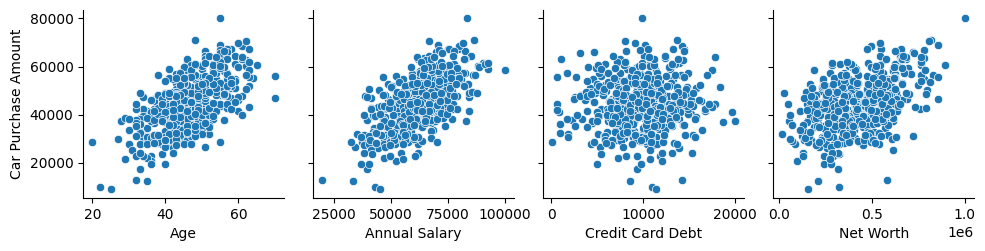

In [ ]:
sns.pairplot(data, x_vars=["Age","Annual Salary", "Credit Card Debt","Net Worth"],y_vars=["Car Purchase Amount"])

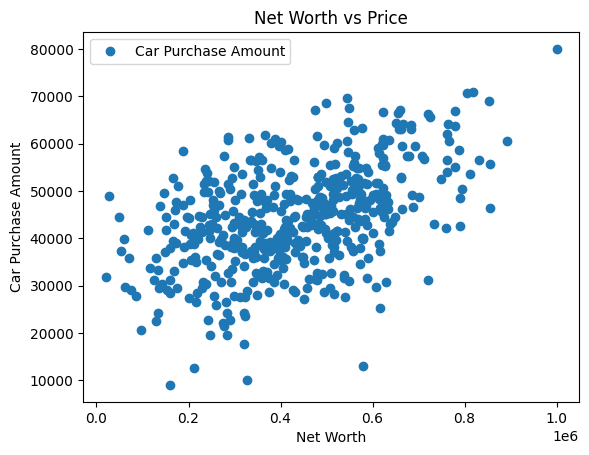

In [ ]:
data.plot(x='Net Worth', y='Car Purchase Amount', style='o')
plt.title('Net Worth vs Price')
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.show()

<Axes: >

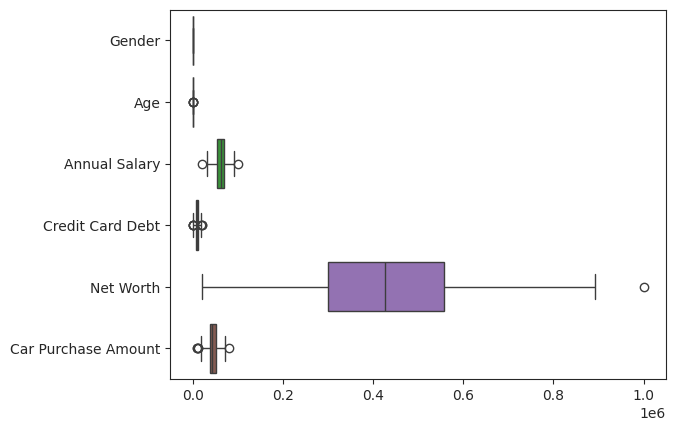

In [ ]:
# mendeteksi outlier
sns.boxplot(data, orient = 'h')

In [ ]:

x = data.drop(['Car Purchase Amount'], axis=1)

## CEK KORELASI

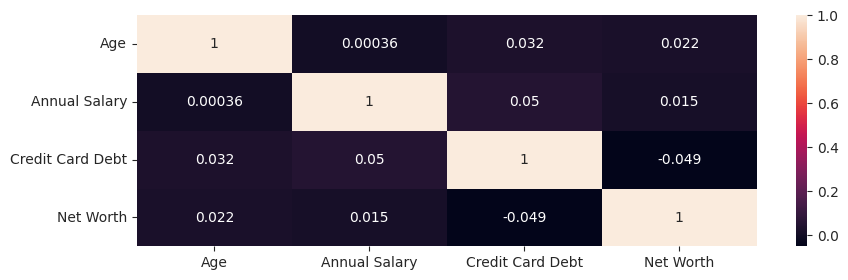

In [ ]:
corr_data = x.corr()
plt.figure(figsize=(10,3))
sns.set_style('ticks')

sns.heatmap(corr_data,annot=True)
plt.show()

#MULTIPLE LINEAR REGRESSION

In [ ]:
x = data.drop(['Car Purchase Amount','Customer Name', 'Customer e-mail', 'Country', 'Gender'], axis=1)
y = data['Car Purchase Amount']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=0)
x_train.shape, x_test.shape

((400, 4), (100, 4))

In [ ]:
x_train.dtypes

Age                   int64
Annual Salary       float64
Credit Card Debt    float64
Net Worth           float64
dtype: object

In [ ]:
jumlah_train = x_train.shape[0]
jumlah_test = x_test.shape[0]

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

-42055.75445865114


In [ ]:
print(regressor.coef_)

[8.39269077e+02 5.62026680e-01 4.79516816e-03 2.89755984e-02]


<Axes: xlabel='Age', ylabel='Car Purchase Amount'>

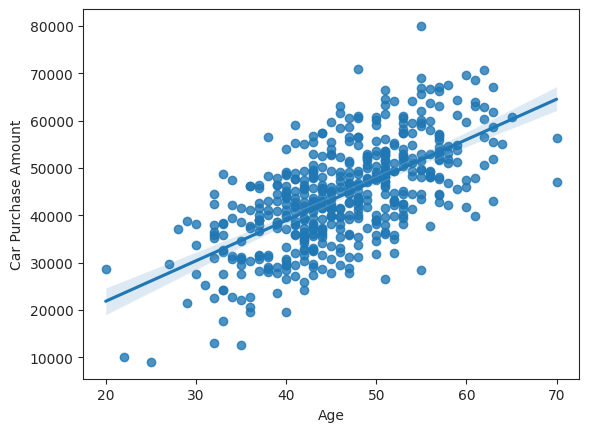

In [ ]:
sns.regplot(x='Age', y='Car Purchase Amount', data=data)

<Axes: xlabel='Annual Salary', ylabel='Car Purchase Amount'>

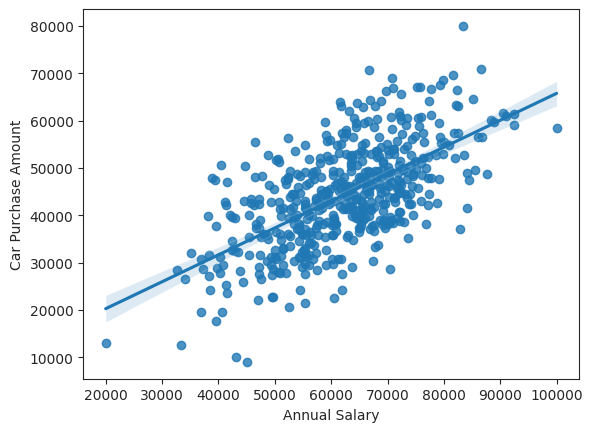

In [ ]:
sns.regplot(x='Annual Salary', y='Car Purchase Amount', data=data)

<Axes: xlabel='Net Worth', ylabel='Car Purchase Amount'>

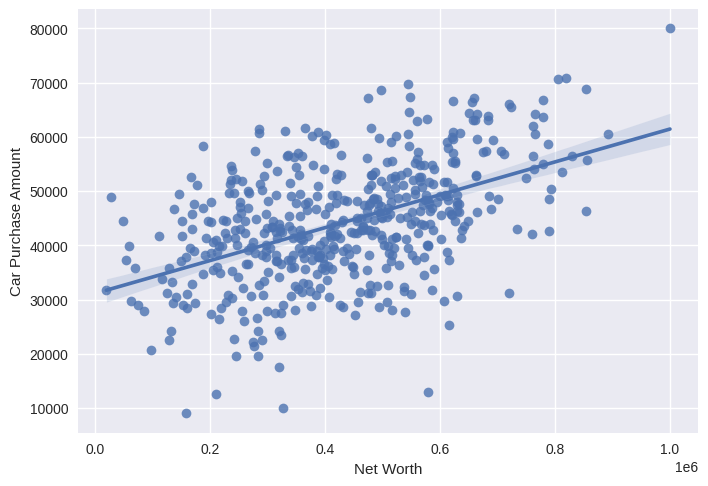

In [ ]:
sns.regplot(x='Net Worth', y='Car Purchase Amount', data=data)

<Axes: xlabel='Credit Card Debt', ylabel='Car Purchase Amount'>

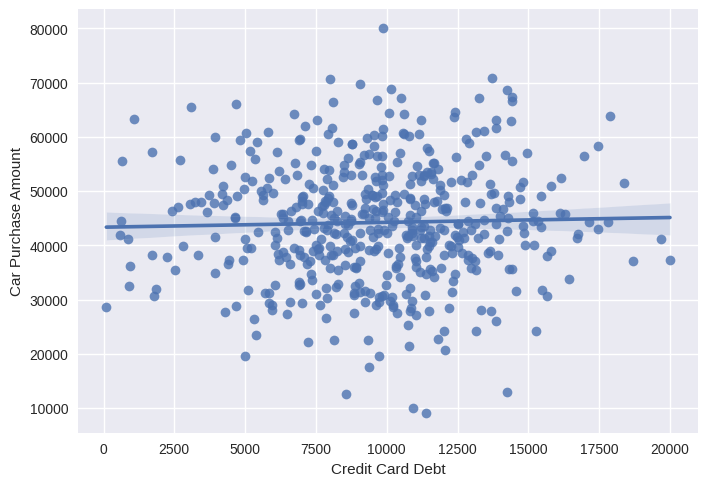

In [ ]:
sns.regplot(x='Credit Card Debt', y='Car Purchase Amount', data=data)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
#Membandingkan y pred dan y test
y_pred = regressor.predict(x_test)
prediksi = pd.DataFrame({'Y Actual': y_test, 'Y Predicted': y_pred})

In [ ]:
prediksi.head()

,Y Actual,Y Predicted
90,38955.21919,38985.267625
254,43401.56612,43221.435309
283,29417.64694,29526.349475
445,52150.41786,52454.689704
461,38243.06228,38661.621432


<ipython-input-36-a88aafc67213>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


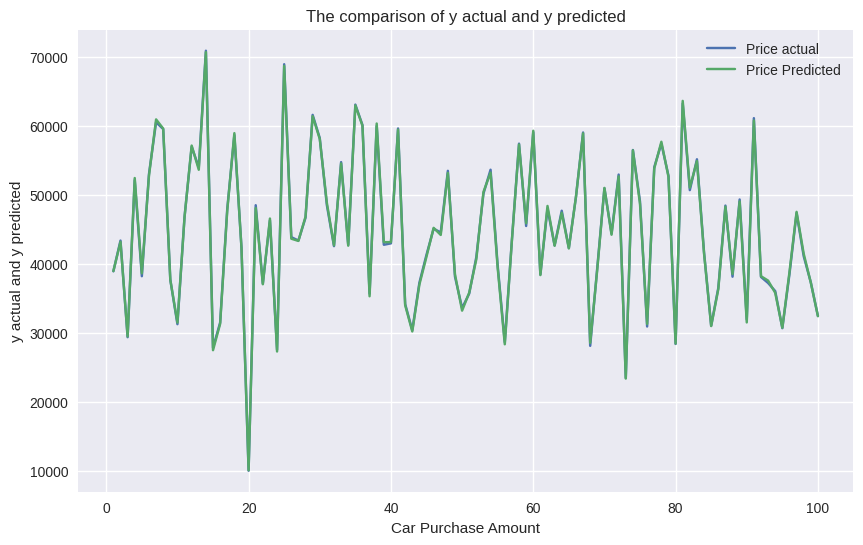

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(np.arange(1,jumlah_test+1,1), prediksi['Y Actual'], label='Price actual')
ax.plot(np.arange(1,jumlah_test+1,1), prediksi['Y Predicted'], label='Price Predicted')
ax.set_title('The comparison of y actual and y predicted')
ax.set_ylabel('y actual and y predicted')
ax.set_xlabel('Car Purchase Amount')
ax.legend()

plt.show()

In [ ]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Max Error: ', round(metrics.max_error(y_test, y_pred)))

Mean Absolute Error(MAE):  215.5252757618472
Mean Squared Error(MSE):  61180.91534381892
Root Mean Squared Error(RMSE):  247.3477619543361
Max Error:  427


In [ ]:
print('R2 Score:',round(metrics.r2_score(y_test, y_pred), 5))

R2 Score: 0.99949


In [ ]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [ ]:
# Train
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Max Error: ', round(metrics.max_error(y_train, y_pred_train)))
print('R2 Score:',round(metrics.r2_score(y_train, y_pred_train), 5))

Mean Absolute Error(MAE):  206.26493314376575
Mean Squared Error(MSE):  57188.732120943016
Root Mean Squared Error(RMSE):  239.14165701722277
Max Error:  442
R2 Score: 0.9995


In [ ]:
# Test
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Max Error: ', round(metrics.max_error(y_test, y_pred_test)))
print('R2 Score:',round(metrics.r2_score(y_test, y_pred_test), 5))

Mean Absolute Error(MAE):  215.5252757618472
Mean Squared Error(MSE):  61180.91534381892
Root Mean Squared Error(RMSE):  247.3477619543361
Max Error:  427
R2 Score: 0.99949
